### Student Information
Name: 吳權晏

Student ID: 108061538

GitHub ID: ChuanYenWu

Kaggle name: ChuanYenWu

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

In [1]:
### Begin Assignment Here

## Part 1. Take home exercises

In [2]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)
#print data shape
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import numpy as np

all_feat=CountVectorizer( tokenizer=nltk.word_tokenize) 
all_feat.fit(train_df['text'])
allfeature_count=all_feat.transform(train_df['text'])

word_freq=np.asarray(allfeature_count.sum(axis=0))[0]

c:\users\me\anaconda3\envs\tensorflow\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [11]:
sort_index=np.argsort(word_freq)   #array index sort in small~big
reverse_index=np.flip(sort_index)         #reverse array index

x=[]
y=[]
for i in reverse_index[:30]:
    x.append(all_feat.get_feature_names()[i])
    y.append(word_freq[i])

import plotly.graph_objs as go
#import matplotlib.pyplot as plt
#plt.figure(figsize=(10,5))
#plt.bar(x,y)
layout = go.Layout(xaxis=dict(type='category'))     #layout setting for int-like string in X, such as '00', '0000'
fig = go.Figure(data=plotdata,layout=layout)            #  plotly see it as integer, so we need layout setting
fig.show()
#plt.show()

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# build analyzers (tfidf)
tfidf_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
tfidf_1000.fit(train_df['text'])

train_data_tfidf_features_1000 = tfidf_1000.transform(train_df['text'])

## check dimension
train_data_tfidf_features_1000.shape

c:\users\me\anaconda3\envs\tensorflow\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



(3613, 1000)

In [11]:
feature_name_1000=tfidf_1000.get_feature_names()
feature_name_1000[100:110]

['awareness',
 'away',
 'awe',
 'awesome',
 'awful',
 'b',
 'baby',
 'back',
 'bad',
 'ball']

#### Code for Exercise3

In [14]:
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

feature_names_500 = BOW_500.get_feature_names()

c:\users\me\anaconda3\envs\tensorflow\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [15]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [16]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'joy', 'joy', 'anger', 'sadness', 'anger', 'fear', 'joy',
       'fear', 'fear'], dtype=object)

In [17]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.66


In [18]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.67      0.70      0.69        84
        fear       0.67      0.65      0.66       110
         joy       0.65      0.65      0.65        79
     sadness       0.66      0.65      0.65        74

    accuracy                           0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.66      0.66      0.66       347



In [19]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[59 12 10  3]
 [15 72 10 13]
 [ 6 13 51  9]
 [ 8 10  8 48]]


In [20]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

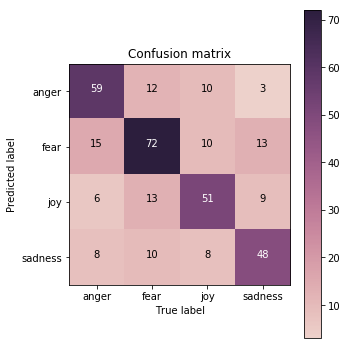

In [21]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

### Answer here

From precision, recall, f1-score, and cofusion matrix above, we can know that although "fear" is the emotion which the time predict correctly is the most, but it also has lots of not-fear label is predicted to fear, which impact the precision. And lots of fear be predicted to other emotion, impact the recall rate. So we can find out that fear is the emotion that contain the most in test data, which leads to get the most correct samples, but the f1-score isn't the best due to precision and recall rate.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [22]:
from sklearn.naive_bayes import MultinomialNB

## build Naive Bayes model
NB_model = MultinomialNB()

## training!
NB_model = NB_model.fit(X_train, y_train)

## predict!
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

In [23]:
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.69


In [24]:
## precision, recall, f1-score,

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.72      0.77      0.75       110
         joy       0.76      0.70      0.73        79
     sadness       0.63      0.62      0.63        74

    accuracy                           0.69       347
   macro avg       0.69      0.69      0.69       347
weighted avg       0.70      0.69      0.69       347



In [25]:
## check by confusion matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 15  5  9]
 [ 8 85  5 12]
 [10  8 55  6]
 [11 10  7 46]]


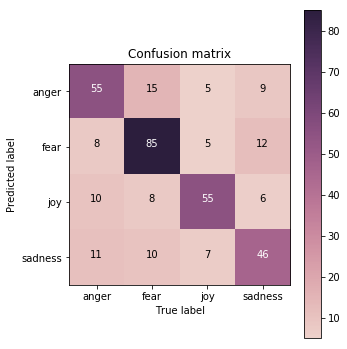

In [26]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

It seems get higher precision and recall on fear and joy than decision tree.

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

#### Answer here
Naive Bayes model: It considers the probability of every feature to each class, at get the class which has biggest probability
to be the answer.

Decision Tree model: It split the class by some conditions, follow the flow of conditions to get the class prediction.

In this set of data, training data: Decision Tree model(0.99) better than Naive Bayes model(0.79), testing data: Naive Bayes model(0.69) little better than Decision Tree model(0.66). In training data the Decision Tree model can cut the condition and split data into exact class, but in testing data it maybe more complex and the condition can't split data that well. Naive Bayes model take 500 feature's probability in to consider, it may be a better choice when data are complex.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

In [27]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

Using TensorFlow backend.


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [28]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

In [29]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [30]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32064     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_2 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
____________________________________________

In [31]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')


Train on 3613 samples, validate on 347 samples
Epoch 1/25
3613/3613 [==============================] - 1s 174us/step - loss: 1.3245 - accuracy: 0.3667 - val_loss: 1.2716 - val_accuracy: 0.4467
Epoch 2/25
3613/3613 [==============================] - 0s 99us/step - loss: 1.0061 - accuracy: 0.6291 - val_loss: 0.9357 - val_accuracy: 0.6657
Epoch 3/25
3613/3613 [==============================] - 0s 93us/step - loss: 0.6056 - accuracy: 0.7855 - val_loss: 0.7876 - val_accuracy: 0.6830
Epoch 4/25
3613/3613 [==============================] - 0s 87us/step - loss: 0.4230 - accuracy: 0.8456 - val_loss: 0.7886 - val_accuracy: 0.6830
Epoch 5/25
3613/3613 [==============================] - 0s 104us/step - loss: 0.3303 - accuracy: 0.8851 - val_loss: 0.8674 - val_accuracy: 0.6888
Epoch 6/25
3613/3613 [==============================] - 0s 94us/step - loss: 0.2734 - accuracy: 0.9076 - val_loss: 0.9074 - val_accuracy: 0.6686
Epoch 7/25
3613/3613 [==============================] - 0s 102us/step - loss: 0.

In [32]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
#training_log

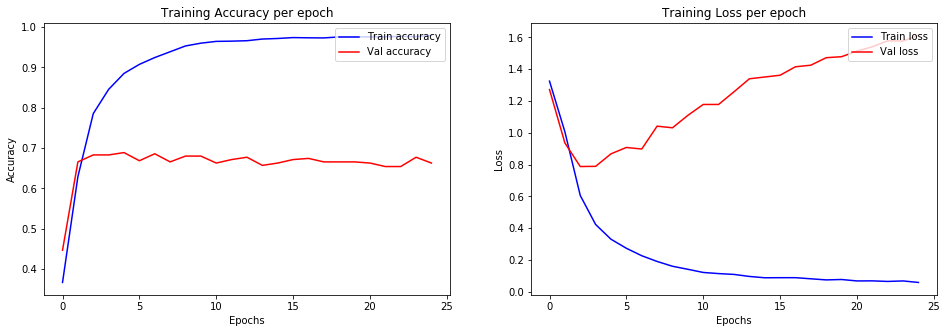

In [33]:
plt.figure(figsize=(16,5))
ax1=plt.subplot(1, 2, 1)
ax1.plot(training_log.loc[:,'epoch'], training_log.loc[:,'accuracy'], color='b', label='Train accuracy')
ax1.plot(training_log.loc[:,'epoch'], training_log.loc[:,'val_accuracy'], color='r', label='Val accuracy')
ax1.set(xlabel='Epochs', ylabel='Accuracy', title='Training Accuracy per epoch')
ax1.legend(loc='upper right', frameon=True)

ax2=plt.subplot(1, 2, 2)
ax2.plot(training_log.loc[:,'epoch'], training_log.loc[:,'loss'], color='b', label='Train loss')
ax2.plot(training_log.loc[:,'epoch'], training_log.loc[:,'val_loss'], color='r', label='Val loss')
ax2.set(xlabel='Epochs', ylabel='Loss', title='Training Loss per epoch')
ax2.legend(loc='upper right', frameon=True)

plt.show()

When epoch goes on, the training data get better accuracy and smaller loss, but for validation data, accuracy don't get well and the loss is getting bigger. So it seems that this model occurs overfitting.

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


#### Method1:
to get a sentence vector, we can get every word's vector times with tfidf, which means the vector impact by importance and appearance frequency, and sum up together

advantage: it will always be in a particular length, same with every word vector<br />
disadvantage: summing might not get every word's meaning, and it may sum up to the vector of other word

In [35]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))

## create the training corpus
training_corpus = train_df['text_tokenized'].values

from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          size=vector_dim, window=window_size, 
                          min_count=min_count, iter=training_iter)
print('Word2Vec training fininsh')

Word2Vec training fininsh


In [36]:
## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
1436,20579,"#TerribleDebateQuestions Madame Secretary, isn...","[#, TerribleDebateQuestions, Madame, Secretary..."
333,10333,@SapientSoldier timid but determined version o...,"[@, SapientSoldier, timid, but, determined, ve..."
2734,30730,"@NebulaJoker No, they aren't. Episodes are ani...","[@, NebulaJoker, No, ,, they, are, n't, ., Epi..."
3162,40335,@WestermannNina xDD it's a song that can not b...,"[@, WestermannNina, xDD, it, 's, a, song, that..."
283,10283,"seek to conduct attacks against Israel, intend...","[seek, to, conduct, attacks, against, Israel, ..."


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=nltk.word_tokenize)
data_tfidf = tfidf_vect.fit_transform(train_df['text'])
data_tfidf.shape

(3613, 10785)

In [ ]:
#but it take too much time for summing, so I comment it here
'''
sentence_vec=np.zeros((len(train_df),100))
i=0
for sentence_token,sentence in zip(train_df.loc[:,'text_tokenized'], train_df.loc[:,'text']):
    sentence_tfidf=tfidf_vect.transform([sentence])
    count=0
    for word in sentence_token:
#        print(type(word),word)
        ratio=0
        if word.lower() in tfidf_vect.get_feature_names():
            word_index=tfidf_vect.get_feature_names().index(word.lower())
            ratio=sentence_tfidf.toarray()[0][word_index]
            sentence_vec[i,:]=sentence_vec[i,:]+word2vec_model.wv[word]*ratio
        count=count+1
    
    sentence_vec[i,:]=sentence_vec[i,:]/count
    i=i+1
'''

#### Method2:
concat every word's vector to a long series, so every vectors won't be change

advantage: every word's vector will be as original, so it absolutely means the word and the sentence, won't change<br />
disadvantage: it will get different length on different sentence, so we need cutting or padding to fit it in model.

In [12]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

#glove_twitter_25_model.most_similar('happy', topn=10)

load ok


In [41]:
vector_whole=[]
for sentence_token,sentence in zip(train_df.loc[:,'text_tokenized'], train_df.loc[:,'text']):
    sentence_vector=[]
    for word in sentence_token:
        if word in glove_twitter_25_model.wv:
            sentence_vector.append(glove_twitter_25_model.wv[word])
    vector_whole.append(sentence_vector)

In [42]:
max_seq_length=10
#dim=25
pad_vec = keras.preprocessing.sequence.pad_sequences(vector_whole, maxlen = max_seq_length,dtype="float32", padding="post", value = 0.0)

In [45]:
#glove_twitter_25_model.vocab.keys()
#glove_twitter_25_model.wv.vocab.keys()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [48]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
#print('\ntarget words: ')
#print(target_words)

#print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
#print(color)

angry_words:  ['angry', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
happy_words:  ['happy', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'information', 'database', 'Data_System_IPEDS', 'data.The', 'OpenSpirit_enabled', 'datafeeds', 'microdata', 'operator_Telecity', 'GT_Datamaker', 'datawarehouse']
fear_words:  ['fear', 'Mining', 'mines', 'coal_mining', 'mine', 'miner', 'uranium_mining', 'miners', 'Mountaintop_removal_coal', 'goldmining', 'alluvial_mining', 'Ok_Tedi_copper', 'uranium_mines', 'coal_mines', 'openpit_mining', 'Mines']


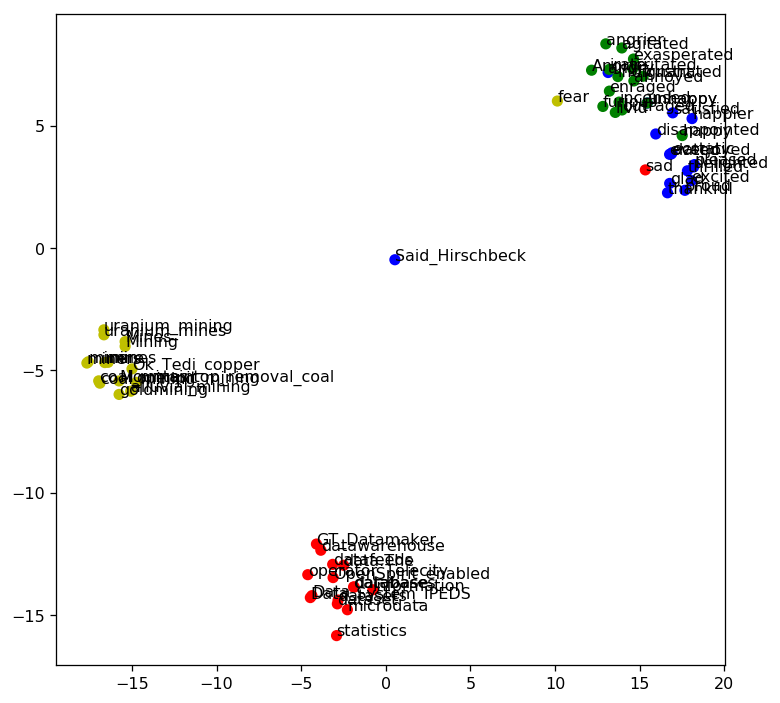

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

## Part 2. Twitter Emotion Competition
See result on the top

## Part 3. Work for the Competition

### Data Preprocessing

#### Comment
When we download the dataset, we will get data_identification.csv, emotion.csv, tweets_DM.json <br />
First, load the json file and change to dataframe type

In [3]:
import json
tweets = []
for line in open('data/tweets_DM.json', 'r'):
    tweets.append(json.loads(line))
    
tweet_id=[]
tweet_text=[]
tweet_hashtag=[]
tweet_score=[]
tweet_date=[]

for i in range(len(tweets)):
    tweet_id.append(tweets[i]['_source']['tweet']['tweet_id'])
    tweet_text.append(tweets[i]['_source']['tweet']['text'])
    tweet_hashtag.append(tweets[i]['_source']['tweet']['hashtags'])
    tweet_score.append(tweets[i]['_score'])
    tweet_date.append(tweets[i]['_crawldate'])
    
import pandas as pd

tweet_df=pd.DataFrame()
tweet_df['tweet_id']=tweet_id
tweet_df['tweet_text']=tweet_text
tweet_df['tweet_hashtag']=tweet_hashtag
tweet_df['tweet_score']=tweet_score
tweet_df['tweet_date']=tweet_date

tweet_df

,tweet_id,tweet_text,tweet_hashtag,tweet_score,tweet_date
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",[Snapchat],391,2015-05-23 11:42:47
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...","[freepress, TrumpLegacy, CNN]",433,2016-01-28 04:52:09
2,0x28b412,"Confident of your obedience, I write to you, k...",[bibleverse],232,2017-12-25 04:39:20
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,[],376,2016-01-24 23:53:05
4,0x2de201,"""Trust is not the same as faith. A friend is s...",[],989,2016-01-08 17:18:59
...,...,...,...,...,...
1867530,0x316b80,When you buy the last 2 tickets remaining for ...,"[mixedfeeling, butimTHATperson]",827,2015-05-12 12:51:52
1867531,0x29d0cb,I swear all this hard work gone pay off one da...,[],368,2017-10-02 17:54:04
1867532,0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...,[],498,2016-10-10 11:04:32
1867533,0x24faed,"Ah, corporate life, where you can date <LH> us...",[],840,2016-09-02 14:25:06


In [4]:
data_identification = pd.read_csv("data/data_identification.csv")
data_identification

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train
...,...,...
1867530,0x227e25,train
1867531,0x293813,train
1867532,0x1e1a7e,train
1867533,0x2156a5,train


In [5]:
data_emotion = pd.read_csv("data/emotion.csv")
data_emotion

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation
...,...,...
1455558,0x38dba0,joy
1455559,0x300ea2,joy
1455560,0x360b99,fear
1455561,0x22eecf,joy


#### Comment
After loading 3 files, we can find that tweet and identification contain both train and test, emotion has only train of course.<br \>
But the order are not the same so we need to sort them to same order to combine them.

In [6]:
sort_tweet=tweet_df.sort_values(by=['tweet_id'])
sort_tweet=sort_tweet.reset_index(drop=True)
sort_tweet

,tweet_id,tweet_text,tweet_hashtag,tweet_score,tweet_date
0,0x1c7f0f,"@JZED74 While inappropriate AF, he likely wasn...",[],62,2017-05-14 11:39:43
1,0x1c7f10,o m g Shut Up And Dance though #BlackMirror <LH>,[BlackMirror],242,2015-05-16 10:36:47
2,0x1c7f11,On #twitch <LH> on the #Destinybeta #Destiny #...,"[twitch, Destinybeta, Destiny, Destiny2, Desti...",915,2016-10-15 20:46:37
3,0x1c7f12,I tried to figure out why you mean so much to ...,[],756,2016-02-14 15:55:45
4,0x1c7f13,"The only “big plan” you ever had in your life,...","[auspol, fizza]",213,2016-07-25 17:05:35
...,...,...,...,...,...
1867530,0x38fe19,Where is #WesHoolahan?! #WALvIRL #COYBIG <LH>,"[WesHoolahan, WALvIRL, COYBIG]",77,2015-02-01 18:04:28
1867531,0x38fe1a,@mattmfm Fake news! <LH> propagated by Tumpkin...,"[not, maga]",25,2016-12-20 17:19:58
1867532,0x38fe1b,I told myself I'd be twitter famous. twitter m...,[],611,2016-02-14 03:24:55
1867533,0x38fe1c,..today was brutal ..#Hungover,[],639,2016-09-13 06:31:27


In [7]:
sort_ident=data_identification.sort_values(by=['tweet_id'])
sort_ident=sort_ident.reset_index(drop=True)
sort_ident

,tweet_id,identification
0,0x1c7f0f,test
1,0x1c7f10,train
2,0x1c7f11,train
3,0x1c7f12,test
4,0x1c7f13,test
...,...,...
1867530,0x38fe19,train
1867531,0x38fe1a,train
1867532,0x38fe1b,test
1867533,0x38fe1c,train


In [8]:
sort_tweet['identification']=sort_ident['identification']
sort_tweet

,tweet_id,tweet_text,tweet_hashtag,tweet_score,tweet_date,identification
0,0x1c7f0f,"@JZED74 While inappropriate AF, he likely wasn...",[],62,2017-05-14 11:39:43,test
1,0x1c7f10,o m g Shut Up And Dance though #BlackMirror <LH>,[BlackMirror],242,2015-05-16 10:36:47,train
2,0x1c7f11,On #twitch <LH> on the #Destinybeta #Destiny #...,"[twitch, Destinybeta, Destiny, Destiny2, Desti...",915,2016-10-15 20:46:37,train
3,0x1c7f12,I tried to figure out why you mean so much to ...,[],756,2016-02-14 15:55:45,test
4,0x1c7f13,"The only “big plan” you ever had in your life,...","[auspol, fizza]",213,2016-07-25 17:05:35,test
...,...,...,...,...,...,...
1867530,0x38fe19,Where is #WesHoolahan?! #WALvIRL #COYBIG <LH>,"[WesHoolahan, WALvIRL, COYBIG]",77,2015-02-01 18:04:28,train
1867531,0x38fe1a,@mattmfm Fake news! <LH> propagated by Tumpkin...,"[not, maga]",25,2016-12-20 17:19:58,train
1867532,0x38fe1b,I told myself I'd be twitter famous. twitter m...,[],611,2016-02-14 03:24:55,test
1867533,0x38fe1c,..today was brutal ..#Hungover,[],639,2016-09-13 06:31:27,train


#### Comment
After combining the tweet and identification, we can seperate them to training data and testing data.<br />
For training data we can combine with the emotion.

In [9]:
train_tweet=sort_tweet[ sort_tweet.loc[:,'identification']=='train' ]
test_tweet=sort_tweet[ sort_tweet.loc[:,'identification']=='test' ]

In [10]:
train_tweet=train_tweet.reset_index(drop=True)
train_tweet

,tweet_id,tweet_text,tweet_hashtag,tweet_score,tweet_date,identification
0,0x1c7f10,o m g Shut Up And Dance though #BlackMirror <LH>,[BlackMirror],242,2015-05-16 10:36:47,train
1,0x1c7f11,On #twitch <LH> on the #Destinybeta #Destiny #...,"[twitch, Destinybeta, Destiny, Destiny2, Desti...",915,2016-10-15 20:46:37,train
2,0x1c7f14,A nice sunny wak this morning not many <LH> ar...,[],939,2016-07-04 07:22:56,train
3,0x1c7f15,I'm one of those people who love candy corn......,"[Confession, NationalCandyCornDay, CouldEatThe...",181,2016-04-16 12:53:40,train
4,0x1c7f16,@metmuseum What are these? They look like some...,[],970,2017-04-22 17:50:28,train
...,...,...,...,...,...,...
1455558,0x38fe18,@LJPBR @FifthHarmony Um My vote For @FifthHar...,[],922,2016-12-06 11:10:57,train
1455559,0x38fe19,Where is #WesHoolahan?! #WALvIRL #COYBIG <LH>,"[WesHoolahan, WALvIRL, COYBIG]",77,2015-02-01 18:04:28,train
1455560,0x38fe1a,@mattmfm Fake news! <LH> propagated by Tumpkin...,"[not, maga]",25,2016-12-20 17:19:58,train
1455561,0x38fe1c,..today was brutal ..#Hungover,[],639,2016-09-13 06:31:27,train


In [11]:
test_tweet=test_tweet.reset_index(drop=True)
test_tweet

,tweet_id,tweet_text,tweet_hashtag,tweet_score,tweet_date,identification
0,0x1c7f0f,"@JZED74 While inappropriate AF, he likely wasn...",[],62,2017-05-14 11:39:43,test
1,0x1c7f12,I tried to figure out why you mean so much to ...,[],756,2016-02-14 15:55:45,test
2,0x1c7f13,"The only “big plan” you ever had in your life,...","[auspol, fizza]",213,2016-07-25 17:05:35,test
3,0x1c7f17,"Looking back on situations old & new, recent o...",[],603,2017-01-21 19:25:33,test
4,0x1c7f18,@jasoninthehouse Why do you insist on talking ...,[],609,2017-04-25 16:36:47,test
...,...,...,...,...,...,...
411967,0x38fe04,"""The Grand Bargain"" The Great American Betraya...","[traitor, treason]",497,2016-12-05 19:57:34,test
411968,0x38fe06,I get to be a 1 year old girl's new mama start...,"[FosterCare, roadtoadoption, Adoption]",187,2017-07-15 19:43:46,test
411969,0x38fe13,Asian dude with dangly gold earrings is back &...,[artworld],139,2017-07-13 07:01:50,test
411970,0x38fe14,I think @kostakoufos might be the worst player...,"[nba, cantmakeaJ]",251,2016-08-22 22:13:06,test


In [13]:
sort_emotion=data_emotion.sort_values(by=['tweet_id'])
sort_emotion=sort_emotion.reset_index(drop=True)
sort_emotion

,tweet_id,emotion
0,0x1c7f10,joy
1,0x1c7f11,anticipation
2,0x1c7f14,joy
3,0x1c7f15,joy
4,0x1c7f16,disgust
...,...,...
1455558,0x38fe18,sadness
1455559,0x38fe19,anticipation
1455560,0x38fe1a,surprise
1455561,0x38fe1c,disgust


In [14]:
train_tweet['emotion']=sort_emotion['emotion']
train_tweet

,tweet_id,tweet_text,tweet_hashtag,tweet_score,tweet_date,identification,emotion
0,0x1c7f10,o m g Shut Up And Dance though #BlackMirror <LH>,[BlackMirror],242,2015-05-16 10:36:47,train,joy
1,0x1c7f11,On #twitch <LH> on the #Destinybeta #Destiny #...,"[twitch, Destinybeta, Destiny, Destiny2, Desti...",915,2016-10-15 20:46:37,train,anticipation
2,0x1c7f14,A nice sunny wak this morning not many <LH> ar...,[],939,2016-07-04 07:22:56,train,joy
3,0x1c7f15,I'm one of those people who love candy corn......,"[Confession, NationalCandyCornDay, CouldEatThe...",181,2016-04-16 12:53:40,train,joy
4,0x1c7f16,@metmuseum What are these? They look like some...,[],970,2017-04-22 17:50:28,train,disgust
...,...,...,...,...,...,...,...
1455558,0x38fe18,@LJPBR @FifthHarmony Um My vote For @FifthHar...,[],922,2016-12-06 11:10:57,train,sadness
1455559,0x38fe19,Where is #WesHoolahan?! #WALvIRL #COYBIG <LH>,"[WesHoolahan, WALvIRL, COYBIG]",77,2015-02-01 18:04:28,train,anticipation
1455560,0x38fe1a,@mattmfm Fake news! <LH> propagated by Tumpkin...,"[not, maga]",25,2016-12-20 17:19:58,train,surprise
1455561,0x38fe1c,..today was brutal ..#Hungover,[],639,2016-09-13 06:31:27,train,disgust


#### Comment
Then I tokenized the tweet to get every term, it also change word to lower case and change word to the original type(ex: runner-> running)

In [15]:
#''''
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

def get_wordnet_pos(tag):
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return None

def lema(sentence):
        
    tokens = word_tokenize(sentence)  
    tagged_sent = pos_tag(tokens)     

    wnl = WordNetLemmatizer()
    lemmas_sent = []
    for tag in tagged_sent:
        wordnet_pos = get_wordnet_pos(tag[1]) or wordnet.NOUN
        lemmas_sent.append(wnl.lemmatize(tag[0], pos=wordnet_pos)) 

    return lemmas_sent

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\me\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\me\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
#''''
import re
from bs4 import BeautifulSoup

def preprocessor( text):
    # remove <LH>
    text = BeautifulSoup(text, 'html.parser').get_text()
    r = '(?::|;|=|X)(?:-)?(?:\)|\(|D|P)'
    emoticons = re.findall(r, text)
    text = re.sub(r, '', text)
    text = re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-','')
    return text

In [17]:
train_tweet['text_tokenized'] = train_tweet['tweet_text'].apply(lambda x: lema(preprocessor(x)))
test_tweet['text_tokenized'] = test_tweet['tweet_text'].apply(lambda x: lema(preprocessor(x)))
train_tweet

c:\users\me\anaconda3\envs\tensorflow\lib\site-packages\bs4\__init__.py:336: MarkupResemblesLocatorWarning: "On our way to Boracay 😂👌 #excited../.." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


,tweet_id,tweet_text,tweet_hashtag,tweet_score,tweet_date,identification,emotion,text_tokenized
0,0x1c7f10,o m g Shut Up And Dance though #BlackMirror <LH>,[BlackMirror],242,2015-05-16 10:36:47,train,joy,"[o, m, g, shut, up, and, dance, though, blackm..."
1,0x1c7f11,On #twitch <LH> on the #Destinybeta #Destiny #...,"[twitch, Destinybeta, Destiny, Destiny2, Desti...",915,2016-10-15 20:46:37,train,anticipation,"[on, twitch, on, the, destinybeta, destiny, de..."
2,0x1c7f14,A nice sunny wak this morning not many <LH> ar...,[],939,2016-07-04 07:22:56,train,joy,"[a, nice, sunny, wak, this, morning, not, many..."
3,0x1c7f15,I'm one of those people who love candy corn......,"[Confession, NationalCandyCornDay, CouldEatThe...",181,2016-04-16 12:53:40,train,joy,"[i, m, one, of, those, people, who, love, cand..."
4,0x1c7f16,@metmuseum What are these? They look like some...,[],970,2017-04-22 17:50:28,train,disgust,"[metmuseum, what, be, these, they, look, like,..."
...,...,...,...,...,...,...,...,...
1455558,0x38fe18,@LJPBR @FifthHarmony Um My vote For @FifthHar...,[],922,2016-12-06 11:10:57,train,sadness,"[ljpbr, fifthharmony, um, my, vote, for, fifth..."
1455559,0x38fe19,Where is #WesHoolahan?! #WALvIRL #COYBIG <LH>,"[WesHoolahan, WALvIRL, COYBIG]",77,2015-02-01 18:04:28,train,anticipation,"[where, be, weshoolahan, walvirl, coybig]"
1455560,0x38fe1a,@mattmfm Fake news! <LH> propagated by Tumpkin...,"[not, maga]",25,2016-12-20 17:19:58,train,surprise,"[mattmfm, fake, news, propagate, by, tumpkins,..."
1455561,0x38fe1c,..today was brutal ..#Hungover,[],639,2016-09-13 06:31:27,train,disgust,"[today, be, brutal, hungover]"


#### Comment
After tokenized, we will get some negation word that contain in klist below.<br />
In my opinion, those word are all for opposite meaning, so I'll change them to the same word 'not', then join them back to a sentence

In [18]:
klist=['aren', 'couldn','con','didn', 'doesn','don', 'hadn', 'hasn', 'haven', 'ain', 'isn', 'mightn', 'mustn', 'needn', 'shouldn', 'wasn', 'weren', 'wouldn']
for j in range(len(train_tweet)):
    for i in range(len(train_tweet.iloc[j]['text_tokenized'])):
        if train_tweet.iloc[j]['text_tokenized'][i] in klist:
            train_tweet.iloc[j]['text_tokenized'][i]='not'

In [19]:
klist=['aren', 'couldn','con','didn', 'doesn','don', 'hadn', 'hasn', 'haven', 'ain', 'isn', 'mightn', 'mustn', 'needn', 'shouldn', 'wasn', 'weren', 'wouldn']
for j in range(len(test_tweet)):
    for i in range(len(test_tweet.iloc[j]['text_tokenized'])):
        if test_tweet.iloc[j]['text_tokenized'][i] in klist:
            test_tweet.iloc[j]['text_tokenized'][i]='not'

In [20]:
def joinword(wlist):
    return ' '.join(word for word in wlist)

train_tweet['text_clean'] = train_tweet['text_tokenized'].apply(lambda x: joinword(x))
test_tweet['text_clean'] = test_tweet['text_tokenized'].apply(lambda x: joinword(x))

In [21]:
train_tweet

,tweet_id,tweet_text,tweet_hashtag,tweet_score,tweet_date,identification,emotion,text_tokenized,text_clean
0,0x1c7f10,o m g Shut Up And Dance though #BlackMirror <LH>,[BlackMirror],242,2015-05-16 10:36:47,train,joy,"[o, m, g, shut, up, and, dance, though, blackm...",o m g shut up and dance though blackmirror
1,0x1c7f11,On #twitch <LH> on the #Destinybeta #Destiny #...,"[twitch, Destinybeta, Destiny, Destiny2, Desti...",915,2016-10-15 20:46:37,train,anticipation,"[on, twitch, on, the, destinybeta, destiny, de...",on twitch on the destinybeta destiny destiny2 ...
2,0x1c7f14,A nice sunny wak this morning not many <LH> ar...,[],939,2016-07-04 07:22:56,train,joy,"[a, nice, sunny, wak, this, morning, not, many...",a nice sunny wak this morning not many aroud a...
3,0x1c7f15,I'm one of those people who love candy corn......,"[Confession, NationalCandyCornDay, CouldEatThe...",181,2016-04-16 12:53:40,train,joy,"[i, m, one, of, those, people, who, love, cand...",i m one of those people who love candy corn a ...
4,0x1c7f16,@metmuseum What are these? They look like some...,[],970,2017-04-22 17:50:28,train,disgust,"[metmuseum, what, be, these, they, look, like,...",metmuseum what be these they look like somethi...
...,...,...,...,...,...,...,...,...,...
1455558,0x38fe18,@LJPBR @FifthHarmony Um My vote For @FifthHar...,[],922,2016-12-06 11:10:57,train,sadness,"[ljpbr, fifthharmony, um, my, vote, for, fifth...",ljpbr fifthharmony um my vote for fifthharmony...
1455559,0x38fe19,Where is #WesHoolahan?! #WALvIRL #COYBIG <LH>,"[WesHoolahan, WALvIRL, COYBIG]",77,2015-02-01 18:04:28,train,anticipation,"[where, be, weshoolahan, walvirl, coybig]",where be weshoolahan walvirl coybig
1455560,0x38fe1a,@mattmfm Fake news! <LH> propagated by Tumpkin...,"[not, maga]",25,2016-12-20 17:19:58,train,surprise,"[mattmfm, fake, news, propagate, by, tumpkins,...",mattmfm fake news propagate by tumpkins not maga
1455561,0x38fe1c,..today was brutal ..#Hungover,[],639,2016-09-13 06:31:27,train,disgust,"[today, be, brutal, hungover]",today be brutal hungover


#### Comment
But in the middle of work, I find that there may still be some terms not really needed for our model,such as tagging username, so I redo a version that clean those thing.

In [22]:
import re
def preprocess_tweet(tweet):
    
    # To lowercase (not good for VADER)
    tweet = tweet.lower()
    
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    
    #Remove @username 
    tweet = re.sub('@[^\s]+','',tweet)
    
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ')
    
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uFFFF')
    
    # Convert hyperlinks ->>>> For now just replace with http
    tweet = re.sub(r'https?:\/\/.*\/\w*', 'http', tweet)
    
    return tweet

In [23]:
train_tweet['content'] = train_tweet.tweet_text.apply(preprocess_tweet)
test_tweet['content'] = test_tweet.tweet_text.apply(preprocess_tweet)

#### Comment
And also delete the number in tweet, because I think it's meanless

In [24]:
def del_num(content):
    return ' '.join(s for s in content.split() if not any(c.isdigit() for c in s))

train_tweet['content'] = train_tweet['content'].apply(lambda x: del_num(x))
test_tweet['content'] = test_tweet['content'].apply(lambda x: del_num(x))

In [25]:
train_tweet['content_token'] = train_tweet['content'].apply(lambda x: lema(preprocessor(x)))
test_tweet['content_token'] = test_tweet['content'].apply(lambda x: lema(preprocessor(x)))

c:\users\me\anaconda3\envs\tensorflow\lib\site-packages\bs4\__init__.py:336: MarkupResemblesLocatorWarning: "on our way to boracay #excited../.." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning
c:\users\me\anaconda3\envs\tensorflow\lib\site-packages\bs4\__init__.py:336: MarkupResemblesLocatorWarning: "." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


In [27]:
klist=['aren', 'couldn','con','didn', 'doesn','don', 'hadn', 'hasn', 'haven', 'ain', 'isn', 'mightn', 'mustn', 'needn', 'shouldn', 'wasn', 'weren', 'wouldn']
def negative(wlist):
    nlist=[]
    for word in wlist:
        nword=word
        if word in klist:
            nword='not'
        nlist.append(nword)
    return nlist

train_tweet['content_token'] = train_tweet['content_token'].apply(lambda x: negative(x))
test_tweet['content_token'] = test_tweet['content_token'].apply(lambda x: negative(x))

In [28]:
def joinword(wlist):
    return ' '.join(word for word in wlist)

train_tweet['content'] = train_tweet['content_token'].apply(lambda x: joinword(x))
test_tweet['content'] = test_tweet['content_token'].apply(lambda x: joinword(x))

In [30]:
train_tweet

,tweet_id,tweet_text,tweet_hashtag,tweet_score,tweet_date,identification,emotion,text_tokenized,text_clean,content,content_token
0,0x1c7f10,o m g Shut Up And Dance though #BlackMirror <LH>,[BlackMirror],242,2015-05-16 10:36:47,train,joy,"[o, m, g, shut, up, and, dance, though, blackm...",o m g shut up and dance though blackmirror,o m g shut up and dance though blackmirror,"[o, m, g, shut, up, and, dance, though, blackm..."
1,0x1c7f11,On #twitch <LH> on the #Destinybeta #Destiny #...,"[twitch, Destinybeta, Destiny, Destiny2, Desti...",915,2016-10-15 20:46:37,train,anticipation,"[on, twitch, on, the, destinybeta, destiny, de...",on twitch on the destinybeta destiny destiny2 ...,on twitch on the destinybeta destiny destinyth...,"[on, twitch, on, the, destinybeta, destiny, de..."
2,0x1c7f14,A nice sunny wak this morning not many <LH> ar...,[],939,2016-07-04 07:22:56,train,joy,"[a, nice, sunny, wak, this, morning, not, many...",a nice sunny wak this morning not many aroud a...,a nice sunny wak this morning not many aroud a...,"[a, nice, sunny, wak, this, morning, not, many..."
3,0x1c7f15,I'm one of those people who love candy corn......,"[Confession, NationalCandyCornDay, CouldEatThe...",181,2016-04-16 12:53:40,train,joy,"[i, m, one, of, those, people, who, love, cand...",i m one of those people who love candy corn a ...,i m one of those people who love candy corn a ...,"[i, m, one, of, those, people, who, love, cand..."
4,0x1c7f16,@metmuseum What are these? They look like some...,[],970,2017-04-22 17:50:28,train,disgust,"[metmuseum, what, be, these, they, look, like,...",metmuseum what be these they look like somethi...,what be these they look like something toddler...,"[what, be, these, they, look, like, something,..."
...,...,...,...,...,...,...,...,...,...,...,...
1455558,0x38fe18,@LJPBR @FifthHarmony Um My vote For @FifthHar...,[],922,2016-12-06 11:10:57,train,sadness,"[ljpbr, fifthharmony, um, my, vote, for, fifth...",ljpbr fifthharmony um my vote for fifthharmony...,um my vote for for song of the summer,"[um, my, vote, for, for, song, of, the, summer]"
1455559,0x38fe19,Where is #WesHoolahan?! #WALvIRL #COYBIG <LH>,"[WesHoolahan, WALvIRL, COYBIG]",77,2015-02-01 18:04:28,train,anticipation,"[where, be, weshoolahan, walvirl, coybig]",where be weshoolahan walvirl coybig,where be weshoolahan walvirl coybig,"[where, be, weshoolahan, walvirl, coybig]"
1455560,0x38fe1a,@mattmfm Fake news! <LH> propagated by Tumpkin...,"[not, maga]",25,2016-12-20 17:19:58,train,surprise,"[mattmfm, fake, news, propagate, by, tumpkins,...",mattmfm fake news propagate by tumpkins not maga,fake news propagate by tumpkins not maga,"[fake, news, propagate, by, tumpkins, not, maga]"
1455561,0x38fe1c,..today was brutal ..#Hungover,[],639,2016-09-13 06:31:27,train,disgust,"[today, be, brutal, hungover]",today be brutal hungover,today be brutal hungover,"[today, be, brutal, hungover]"


#### Comment
Then we can save these two dataframe as our data that has been little preprocessing.

In [29]:
train_tweet.to_csv('train_tweet.csv')
test_tweet.to_csv('test_tweet.csv')

### Model trying & feature Engineering(This part will take long time to run so I'll just paste some code and explain what I did)

#### Comment
We can find out that the data of every type is very unbalance, so what I try is to sample some amount in each type, and we can sample some times to get different data. But there's still some problem, the emotion with fewer data will always sample the same, and some data in the emotion which has lots of data may not be sampled.

joy             516017
anticipation    248935
trust           205478
sadness         193437
disgust         139101
fear             63999
surprise         48729
anger            39867
Name: emotion, dtype: int64


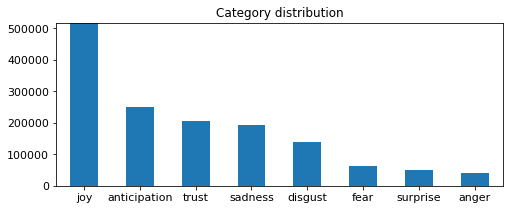

In [33]:
print(sort_emotion.emotion.value_counts())
M=max(sort_emotion.emotion.value_counts())

# plot barchart for X_sample
sort_emotion.emotion.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, M+1000],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

In [ ]:
#####classify
sort_emotion_joy=sort_emotion[ sort_emotion.loc[:,'emotion']=='joy' ]
train_tweet_joy=train_tweet[ sort_emotion.loc[:,'emotion']=='joy' ]

sort_emotion_sadness=sort_emotion[ sort_emotion.loc[:,'emotion']=='sadness' ]
train_tweet_sadness=train_tweet[ sort_emotion.loc[:,'emotion']=='sadness' ]

sort_emotion_anticipation=sort_emotion[ sort_emotion.loc[:,'emotion']=='anticipation' ]
train_tweet_anticipation=train_tweet[ sort_emotion.loc[:,'emotion']=='anticipation' ]

sort_emotion_trust=sort_emotion[ sort_emotion.loc[:,'emotion']=='trust' ]
train_tweet_trust=train_tweet[ sort_emotion.loc[:,'emotion']=='trust' ]

sort_emotion_disgust=sort_emotion[ sort_emotion.loc[:,'emotion']=='disgust' ]
train_tweet_disgust=train_tweet[ sort_emotion.loc[:,'emotion']=='disgust' ]

sort_emotion_fear=sort_emotion[ sort_emotion.loc[:,'emotion']=='fear' ]
train_tweet_fear=train_tweet[ sort_emotion.loc[:,'emotion']=='fear' ]

sort_emotion_surprise=sort_emotion[ sort_emotion.loc[:,'emotion']=='surprise' ]
train_tweet_surprise=train_tweet[ sort_emotion.loc[:,'emotion']=='surprise' ]

sort_emotion_anger=sort_emotion[ sort_emotion.loc[:,'emotion']=='anger' ]
train_tweet_anger=train_tweet[ sort_emotion.loc[:,'emotion']=='anger' ]

### First method trying: word vector

#### Comment
Thinking the dataset is from twitter, so using glove twitter wordvec model may be a good idea, after changing word to vector, the sentences need to cut or pad to same length in order to fit the model.(choose a length that won't be too long and might not cut off too much information)

In [ ]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_50_model = api.load("glove-twitter-50")
print('load ok')

In [ ]:
def token_to_vec(tweet_dataframe):
    vector_whole=[]
    for sentence_token,sentence in zip(tweet_dataframe.loc[:,'text_tokenized'], tweet_dataframe.loc[:,'tweet_text']):
        sentence_vector=[]
        for word in sentence_token:
            if word in glove_twitter_50_model.wv:
                sentence_vector.append(glove_twitter_50_model.wv[word])
        vector_whole.append(sentence_vector)
    return vector_whole

In [ ]:
import keras
def padding(vector_whole):
    max_seq_length=20
    #dim=25
    pad_vec = keras.preprocessing.sequence.pad_sequences(vector_whole, maxlen = max_seq_length,dtype="float32", padding="post", value = 0.0)
    return pad_vec

In [ ]:
def sample_nohash(t_joy,e_joy,n_joy, t_sad,e_sad,n_sad, t_anti,e_anti,n_anti, t_tru,e_tru,n_tru, t_disg,e_disg,n_disg, 
                 t_fear,e_fear,n_fear, t_sup,e_sup,n_sup, t_ang,e_ang,n_ang):
    #joy
    samp_t_joy=t_joy.sample(n_joy)
    samp_e_joy=e_joy.loc[samp_t_joy.index]
    #sadness
    samp_t_sad=t_sad.sample(n_sad)
    samp_e_sad=e_sad.loc[samp_t_sad.index]
    #anticipation
    samp_t_anti=t_anti.sample(n_anti)
    samp_e_anti=e_anti.loc[samp_t_anti.index]
    #trust
    samp_t_tru=t_tru.sample(n_tru)
    samp_e_tru=e_tru.loc[samp_t_tru.index]
    #disgust
    samp_t_disg=t_disg.sample(n_disg)
    samp_e_disg=e_disg.loc[samp_t_disg.index]
    #fear
    samp_t_fear=t_fear.sample(n_fear)
    samp_e_fear=e_fear.loc[samp_t_fear.index]
    #surprise
    samp_t_sup=t_sup.sample(n_sup)
    samp_e_sup=e_sup.loc[samp_t_sup.index]
    #anger
    samp_t_ang=t_ang.sample(n_ang)
    samp_e_ang=e_ang.loc[samp_t_ang.index]
    
#    return samp_t_joy,samp_e_joy, samp_t_sad,samp_e_sad, samp_t_anti,samp_e_anti, samp_t_tru,samp_e_tru,    \
#            samp_t_disg,samp_e_disg, samp_t_fear,samp_e_fear, samp_t_sup,samp_e_sup, samp_t_ang,samp_e_ang

    train_tweet=pd.concat([ samp_t_joy[:-3000], samp_t_sad[:-3000], samp_t_anti[:-3000], samp_t_tru[:-3000], 
                            samp_t_disg[:-3000], samp_t_fear[:-3000], samp_t_sup[:-3000], samp_t_ang[:-3000] ])
    
    train_emo=pd.concat([ samp_e_joy[:-3000], samp_e_sad[:-3000], samp_e_anti[:-3000], samp_e_tru[:-3000], 
                            samp_e_disg[:-3000], samp_e_fear[:-3000], samp_e_sup[:-3000], samp_e_ang[:-3000] ])
    
    test_tweet=pd.concat([ samp_t_joy[-3000:], samp_t_sad[-3000:], samp_t_anti[-3000:], samp_t_tru[-3000:], 
                            samp_t_disg[-3000:], samp_t_fear[-3000:], samp_t_sup[-3000:], samp_t_ang[-3000:] ])
    
    test_emo=pd.concat([ samp_e_joy[-3000:], samp_e_sad[-3000:], samp_e_anti[-3000:], samp_e_tru[-3000:], 
                            samp_e_disg[-3000:], samp_e_fear[-3000:], samp_e_sup[-3000:], samp_e_ang[-3000:] ])
    
    train_vec=token_to_vec(train_tweet)
    test_vec=token_to_vec(test_tweet)
    
    train_vec=padding(train_vec)
    test_vec=padding(test_vec)
    
    return train_vec, train_emo, test_vec, test_emo

#### Comment
sample them and change to vector and padding

In [ ]:
train_vec, train_emo, test_vec, test_emo = \
sample_nohash(train_tweet_joy,sort_emotion_joy,48000, train_tweet_sadness,sort_emotion_sadness,33000,
              train_tweet_anticipation,sort_emotion_anticipation,33000, 
              train_tweet_trust,sort_emotion_trust,33000, train_tweet_disgust,sort_emotion_disgust,27000, 
              train_tweet_fear,sort_emotion_fear,27000, train_tweet_surprise,sort_emotion_surprise,18000,
              train_tweet_anger,sort_emotion_anger,18000)

#### Comment
encode the emotion to one-hot

In [ ]:
## deal with label (string -> one-hot)
import keras
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(train_emo_nohash.loc[:,'emotion'])

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, train_emo.loc[:,'emotion'])
y_test = label_encode(label_encoder, test_emo.loc[:,'emotion'])

#### Comment
shuffle the data

In [ ]:
x_train=np.array(train_vec)
x_test=np.array(test_vec)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
def shuffle(X,Y):
  np.random.seed(10)
  randomList = np.arange(X.shape[0])
  np.random.shuffle(randomList)
  return X[randomList], Y[randomList]

In [ ]:
x_train, y_train = shuffle(x_train, y_train)

#### Comment
reshape from 3-dimension to 2-dimension for dense type model

In [ ]:
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
x_test=x_test.reshape((x_test.shape[0],x_test.shape[1]*x_test.shape[2]))

#### Comment
and now we can fit the data into the model, the dropout is added to avoid overfitting

In [ ]:
# I/O check
input_shape_seq = x_train.shape[1]
print('input_seq_shape: ', input_shape_seq)

#input_shape_vec = x_train.shape[2]
#print('input_vec_shape: ', input_shape_vec)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense, LSTM, Dropout
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape_seq, ))  # 20*100
X = model_input

# 1st hidden layer
X_W1 = Dense(units=1024)(X)  # 64
H1 = ReLU()(X_W1)
D1 = Dropout(0.4)(H1)

# 2nd hidden layer
H1_W2 = Dense(units=256)(D1)  # 64
H2 = ReLU()(H1_W2)
D2 = Dropout(0.4)(H2)


# output layer
H2_W3 = Dense(units=output_shape)(D2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

In [ ]:
from keras.callbacks import CSVLogger

#csv_logger = CSVLogger('logs/training_lstm_log.csv')

# training setting
epochs = 15
batch_size = 1024

# training!
history = model.fit(x_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
#                    callbacks=[csv_logger],
                    validation_data = (x_test, y_test))
print('training finish')

#### Comment
Then I'll repeat this flow a few time for different sampling(and fit in the same model), after this I'll get a accuracy around 0.35

#### Comment
I also tried BiLSTM model as below, because the texts are word in 'series', it contains time order.  Indeed it got a little better than dense, like around 0.38~0.4 accuracy.

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense, LSTM, Dropout, Bidirectional
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape_seq, input_shape_vec))  # 20*100
X = model_input

#Bidirectional LSTM
B = Bidirectional(LSTM(1000,return_sequences=False),merge_mode="concat")(X)

# 1st hidden layer
X_W1 = Dense(units=1024)(B)  # 64
H1 = ReLU()(X_W1)
D1 = Dropout(0.4)(H1)

# 2nd hidden layer
H1_W2 = Dense(units=256)(D1)  # 64
H2 = ReLU()(H1_W2)
D2 = Dropout(0.4)(H2)


# output layer
H2_W3 = Dense(units=output_shape)(D2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

### TFIDF

#### Comment
In tfidf based, we can delete words that are not important by stopword, I use the stopword list in nltk.corpus, but I remove the negative word for opposite meaning.

In [ ]:
from nltk.corpus import stopwords
stop_list=stopwords.words('english')   
stop_list.remove('no')
stop_list.remove('nor')
stop_list.remove('not')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# build analyzers (tfidf)
tfidf_5000 = TfidfVectorizer(max_features=5000,stop_words=stop_list)

# apply analyzer to training data
tfidf_5000.fit(train_tweet['content'])

train_data_tfidf_features_5000 = tfidf_5000.transform(train_tweet['content'])

## check dimension
train_data_tfidf_features_5000.shape

#### Comment
After getting tfidf features, we can try it on decision tree and naive bayes model, but they get accuracy around 0.3 in this 8 label emotion classfication.

In [ ]:
#Decision tree
y_train_tree=train_tweet['emotion']
train_data_tfidf_features_5000, y_train_tree=shuffle(train_data_tfidf_features_5000, np.array(y_train_tree))

from sklearn.tree import DecisionTreeClassifier

## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(train_data_tfidf_features_5000, y_train_tree)

## predict!
y_train_pred = DT_model.predict(train_data_tfidf_features_5000)
y_test_pred = DT_model.predict(test_data_tfidf_features_5000)

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB

## build Naive Bayes model
NB_model = MultinomialNB()

## training!
NB_model = NB_model.fit(train_data_tfidf_features_5000, y_train_tree)

## predict!
y_train_pred = NB_model.predict(train_data_tfidf_features_5000)
y_test_pred = NB_model.predict(test_data_tfidf_features_5000)

#### Comment
So I try tfidf with dense model, after testing tfidf max_features=1000 and max_features=2000, I choose 2000 for getting more information. When fitting them into model above, first I tried sample each type emotion and repeat, but it doesn't get a good result, only like around 0.35, I think the reason is just like what I consider above, emotion with less data always get same tweet text, emotion with large data have some tweet never been chosen.<br />

With this consideration, the second method I try is cutting the whole training data into 7 pieces, then fitting them like
k-fold cross-validation: 6 pieces for training, 1 piece for validation. After running, I get accuracy around 0.41

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense, LSTM, Dropout
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape_seq, ))  # 20*100
X = model_input

# 1st hidden layer
X_W1 = Dense(units=1024)(X)  # 64
H1 = ReLU()(X_W1)
D1 = Dropout(0.4)(H1)

# 2nd hidden layer
H1_W2 = Dense(units=256)(D1)  # 64
H2 = ReLU()(H1_W2)
D2 = Dropout(0.4)(H2)


# output layer
H2_W3 = Dense(units=output_shape)(D2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

#### Comment
Although trying lots of method or model, the accuracy seems to stuck at 0.4, I think there's some reason: <br />

1) data unbalance: in this situation, we will fit anger with same data, but joy will get a very diverse range.

2) for word in sentences, maybe there are some word that's important but model only see few times, model can't capture every sentence and every word in this large dataset.

I also try seperating tweet into group with or without hashtag, but it seems no help since lots of tweet using hashtag with nonsence or strange word that only known by people who post this tweet.

### Bert

#### Comment
So in this case, I try using BERT, the power pre-train model, which can "learn the sentence's meaning". By this pretrain model, which might get every word's meaning in dataset, what we need to do is to train and tune the parameter for our emotion classification task.

I train BERT base on google-research/bert on github, and because BERT is a very huge model and I've no gpu resource, so I train it on google colab.The website:[Code of BERT](https://colab.research.google.com/drive/1JWiuqmkGKAjHgOvEL6oMbDtLVaKAvY45)

Sadly, code on the colab but the result isn't, since the colab burst when I try to train a 2-epoch version.

I've tried BERT with 10,000 data, 600,000 data, and full training dataset with 1 epoch training. Amazingly, it get 0.43 on public score for training only 10,000 data, which meaning it has the power tune the way to classify the emotion in such little data. For  600,000 data, and full training dataset, it got 0.48 and 0.53, unfortunate that I failed training 2-epoch on full dataset, or maybe the model can get a little better tuning.

From this experience, we can know that BERT really has power since it contains lots and lots of pretrain data. So we can get the extraction like in a global version, not only in the dataset we have.

### Ensemble learning

#### Comment
This method is to look mutiple models and get the majority decision of each data. For me, I choose three BERT that I tried, but accuracy drops since 10,000 data, 600,000 data perform not as well as full dataset version. If I can get model that has similar accuracy, it has the chance to get the answer that "most model think it's the right answer" and the accuracy may get little higher.